In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
dataset = pd.read_csv("datasets/Position_Salaries.csv")
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [22]:
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [23]:
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


standard scalar class expects a 2D array for fit_transform.

so we reshape our y

In [24]:
y = y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


Train test split

Here I have not done train test split to make my model learn from the complete dataset.

For predictions, I will use new data rather than test set data

**note:**

If we do train test split, we have to apply feature scaling after the split and only on train set.

Feature scaling

In [25]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [26]:
print(X)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


As we can see. standardization makes the data in range -3 to +3

Train SVR on whole dataset

In [27]:
from sklearn.svm import SVR
model = SVR(kernel = 'rbf')
model.fit(X,y)

C:\Users\animesh.padhy\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

predict new result

In [30]:
prediction = model.predict(sc_X.transform([[6.5]])).reshape(-1,1)
result = sc_y.inverse_transform(prediction)

#combinely can be written as
# sc_y.inverse_transform(model.predict(sc_X.transform([[6.5]])).reshape(-1,1))


result

array([[170370.0204065]])

Vizualising SVR result

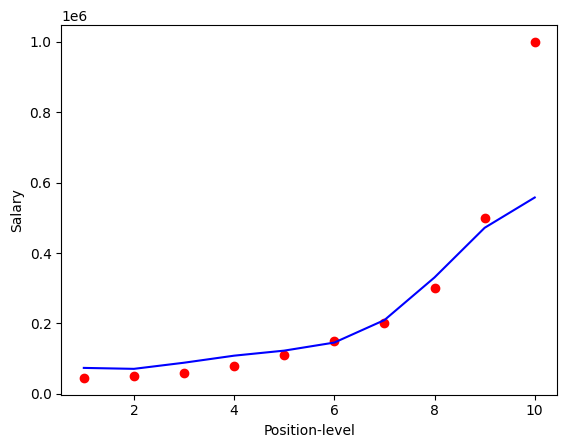

In [32]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='r')
plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(model.predict(X).reshape(-1,1)),color='b')
plt.xlabel('Position-level')
plt.ylabel('Salary')
plt.show()

Vizualising SVR results (for higher resolution and smoother curve)

C:\Users\animesh.padhy\AppData\Local\Temp\ipykernel_25748\1517525597.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)


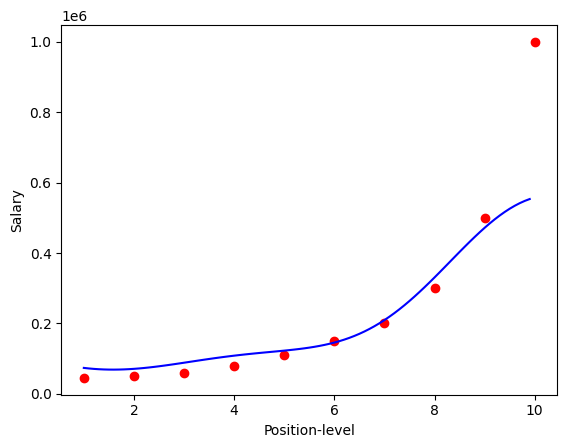

In [35]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='r')
plt.plot(X_grid, sc_y.inverse_transform(model.predict(sc_X.transform(X_grid)).reshape(-1,1)),color='b')
plt.xlabel('Position-level')
plt.ylabel('Salary')
plt.show()